<a href="https://colab.research.google.com/github/msharma1207/Optimaization/blob/main/Assignment_02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import csv
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt


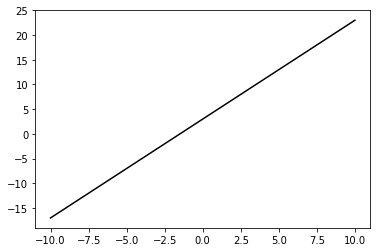

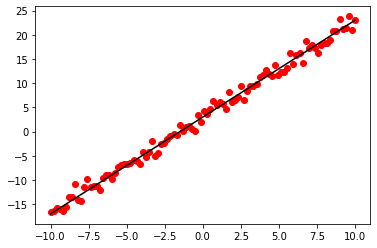

In [ ]:
'''   
1. Generate a set of points around a line y = ax + b
(a) Choose a = 2 and b = 3
(b) Select the range for x as [−10, 10] and generate n = 100 values for x
in that interval.
(c) Compute the values of y for each x as yi = 2xi + 3.
(d) Plot the line y = 2x + 3 in black color.
(e) Generate a set of n points around the line using the equation
yi = 2xi + 3 + σN (0, 1) (1)
where σ is the standard deviation and N (0, 1) is the zero-mean unity variance normal distribution
(f) Show the scatter plot of these noisy points (in red color) on the same
graph generated in step (d).
'''
x=np.linspace(-10,10,100)
y=2*x+3
plt.plot(x,y,color='black')
plt.show()

bias=np.random.normal(loc=0, scale=1,size=100)
y_obs = y + bias
plt.scatter(x,y_obs,color="red")
plt.plot(x,y,color='black')
plt.show()

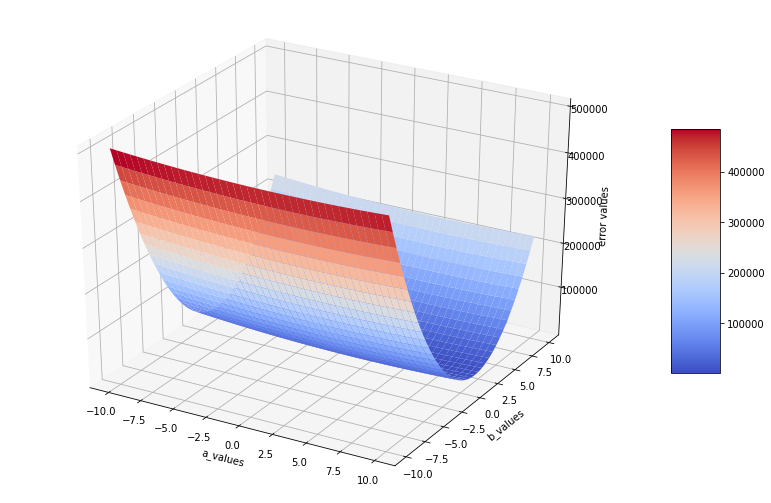

In [ ]:
'''
2. Plot the average error surface E for different values of a and b in the
interval of [−10 : 0.1 : 10].
(a) Vary both a and b in steps of 0.1 in the interval [−10, 10]
(b) Compute the element-wise error as ei = yi − yˆi where ˆyi = axi + b
and yi
is computed using equation 1
(c) Compute the average error as
E =
1
n
Xn
i=i
ei
2
(2)
(d) Compute the average error values for all combinations of a and b.
(e) Plot the error surface with the va
'''
a=np.linspace(-10,10,201)
b=np.linspace(-10,10,201)
E=np.zeros((201,201))
for i,ai in enumerate(a):
  for j,bj in enumerate(b):
    E[i][j]=np.sum((y_obs-ai*x-bj)**2)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
aa, bb = np.meshgrid(a,b)
my_plot = ax.plot_surface(aa,bb,E,cmap=cm.coolwarm)
ax.set_xlabel('a_values')
ax.set_ylabel('b_values')
ax.set_zlabel('error values')
fig.colorbar(my_plot, shrink=0.5, aspect=5)
plt.show()

In [ ]:
'''
3. Solve for a and b using Pseudo-inverse based approach on the points generated in question 1.
'''

n_samples=100
x=np.linspace(-10,10,n_samples)
y=2*x+3
bias=np.random.normal(loc=0, scale=1,size=n_samples)
y_obs = y + bias
x=x.reshape(n_samples,1)
ones = np.ones((n_samples,1))
x = np.concatenate((ones, x), axis=1)
y_obs = y_obs.reshape(n_samples,1)
w_arbitrary=np.zeros((2,1))

# x[i][0]=1, x[i][1]=feature value for ith training example
#w[0][0]=b, w[0][1]=a

a=w_arbitrary[1][0]
b=w_arbitrary[0][0]
y_predicted=np.matmul(x,w_arbitrary)
J_initial=np.matmul((y_predicted-y_obs).T,(y_predicted-y_obs))/(2*n_samples)
print("Initially weights are: ",a,b)
print("Error before calculation: ",J_initial[0][0])

W_calculated = np.matmul(np.linalg.inv(np.matmul(x.T, x)), np.matmul(x.T,y))##calculating weights using Pseudo-inverse
W_calculated = W_calculated.reshape(2,1)
b=W_calculated[0][0]
a=W_calculated[1][0]
y_cur=np.matmul(x,W_calculated)

J_final=np.matmul((y_cur-y_obs).T,(y_cur-y_obs))/(2*n_samples)
print("After calculation weights are ",a,b)
print("Error after calculation: ",J_final[0][0])








Initially weights are:  0.0 0.0
Error before calculation:  72.15523568714241
After calculation weights are  2.000000000000001 3.0
Error after calculation:  0.5248892340420501


Initial Weights:  [[-9.73]
 [10.31]]
Initial Error:  [[2369.98184802]]


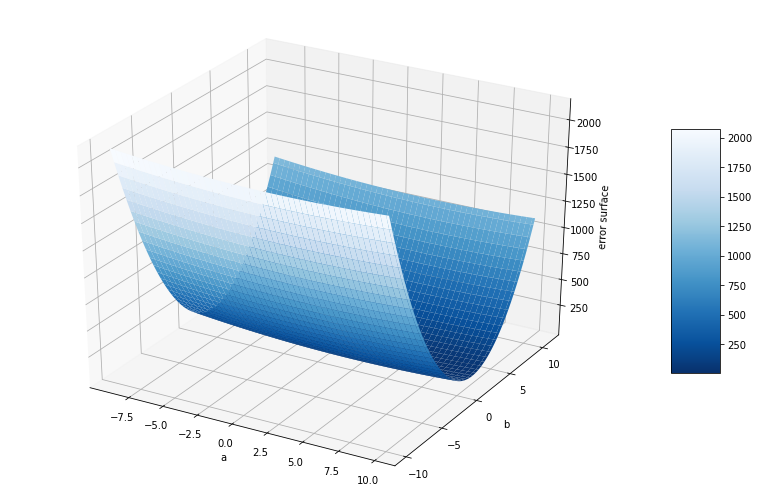

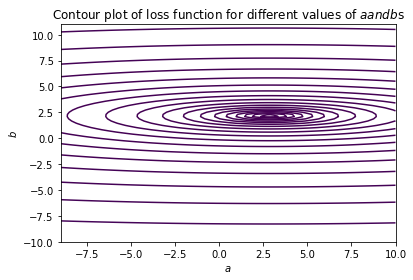

learning rate:  0.001
 [a,b]:  [[1.6405766  9.62305111]]
 error:  [[24.20005175]]


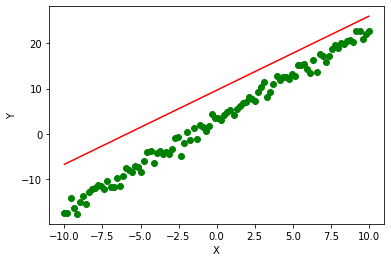

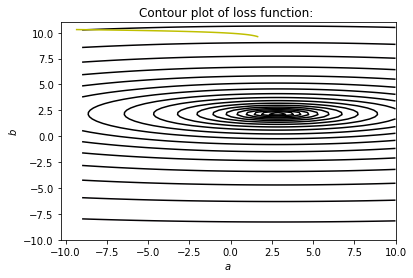

learning rate:  0.002
 [a,b]:  [[1.99936066 9.00091332]]
 error:  [[18.01826801]]


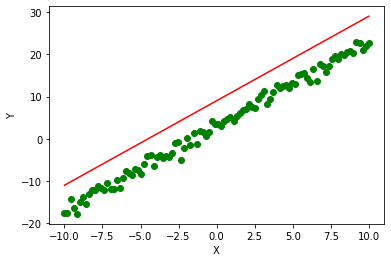

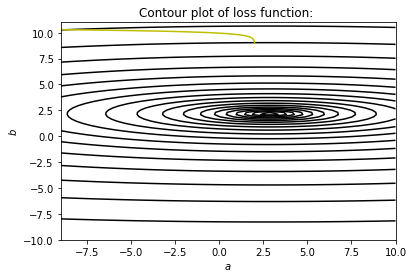

learning rate:  0.003
 [a,b]:  [[2.00935908 8.43752788]]
 error:  [[14.84773616]]


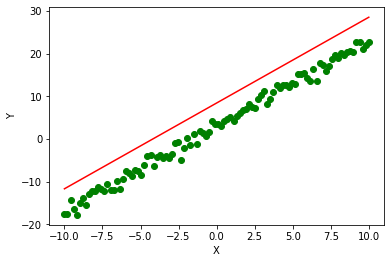

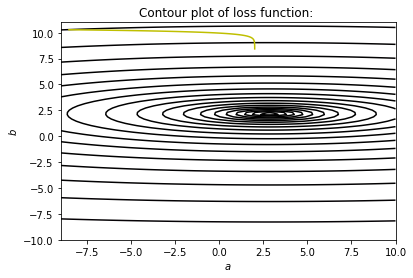

learning rate:  0.004
 [a,b]:  [[2.0096029 7.9273972]]
 error:  [[12.25233456]]


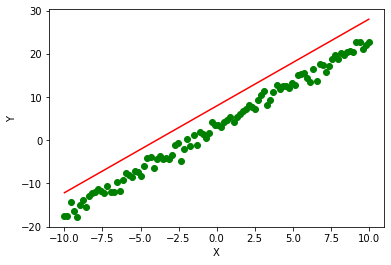

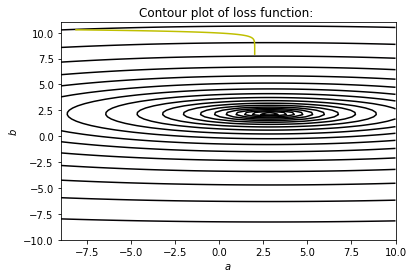

learning rate:  0.005
 [a,b]:  [[2.00960805 7.46553336]]
 error:  [[10.12696656]]


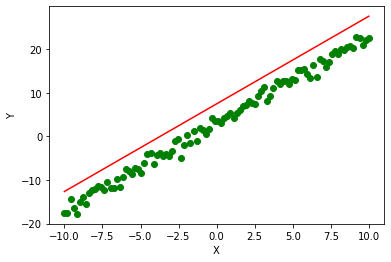

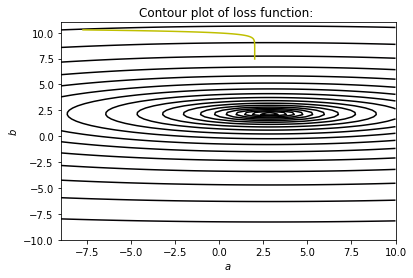

learning rate:  0.006
 [a,b]:  [[2.00960815 7.04741127]]
 error:  [[8.38685664]]


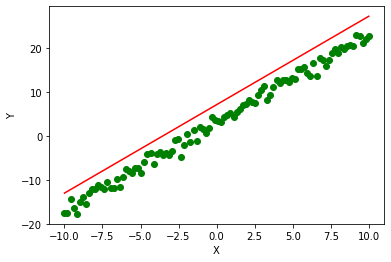

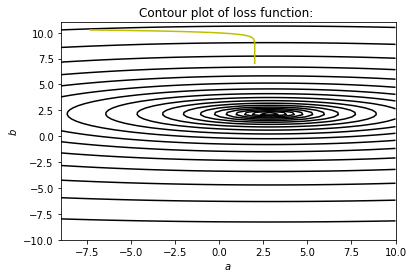

learning rate:  0.007
 [a,b]:  [[2.00960815 6.66892618]]
 error:  [[6.96245704]]


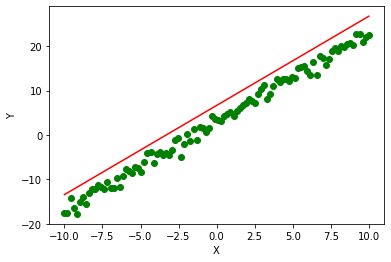

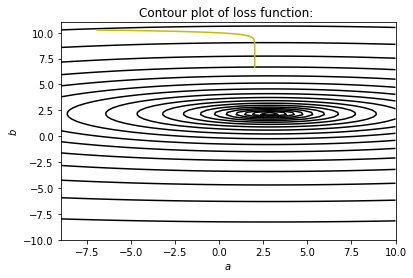

learning rate:  0.008
 [a,b]:  [[2.00960815 6.32635494]]
 error:  [[5.79672306]]


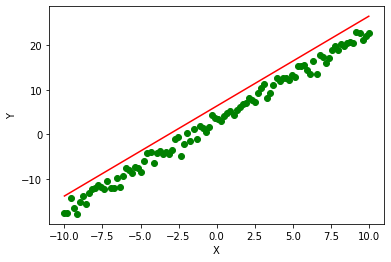

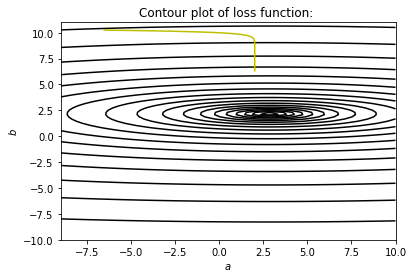

learning rate:  0.009
 [a,b]:  [[2.00960815 6.01632091]]
 error:  [[4.84287471]]


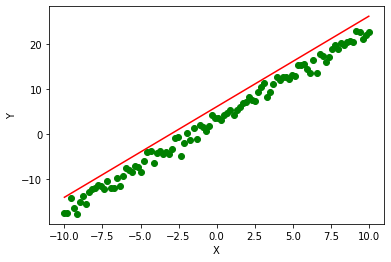

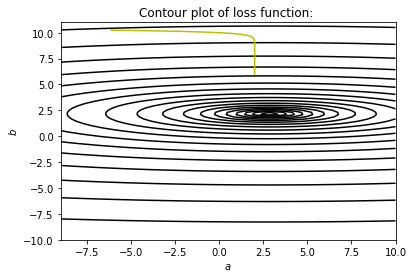

learning rate:  0.01
 [a,b]:  [[2.00960815 5.73576198]]
 error:  [[4.0625573]]


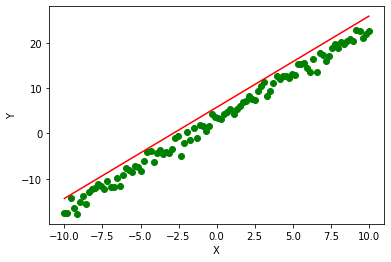

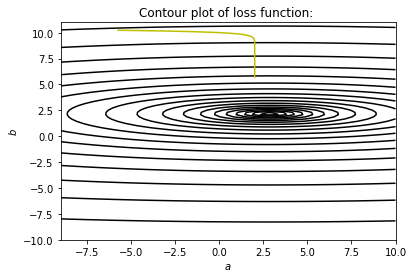

learning rate:  0.02
 [a,b]:  [[2.00960815 4.05162933]]
 error:  [[1.03288656]]


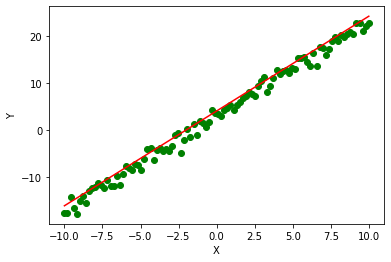

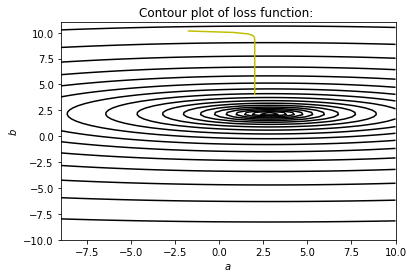

learning rate:  0.03
 [a,b]:  [[2.00960815 3.43784893]]
 error:  [[0.63393319]]


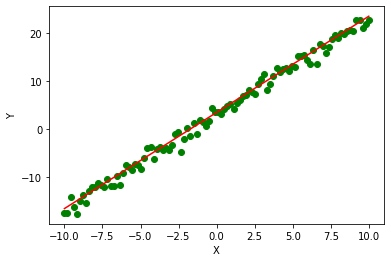

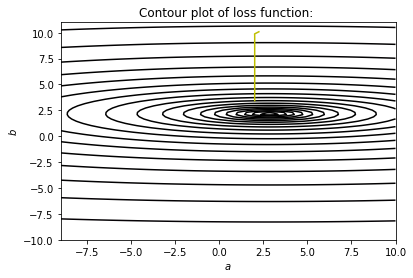

learning rate:  0.04
 [a,b]:  [[2.00960815 3.21646913]]
 error:  [[0.58248153]]


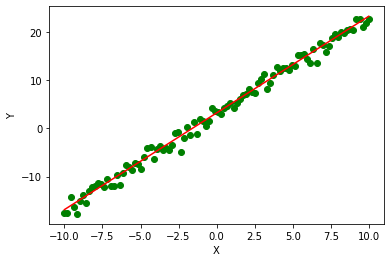

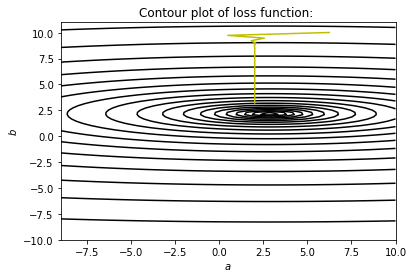

learning rate:  0.05
 [a,b]:  [[2.00960815 3.1374636 ]]
 error:  [[0.57598562]]


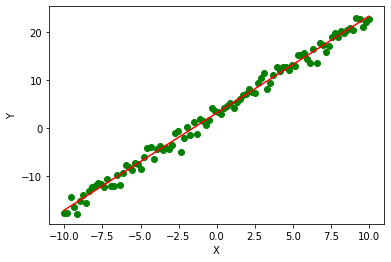

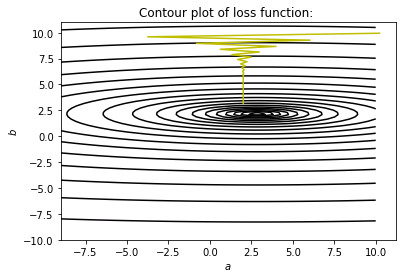

learning rate:  0.056
 [a,b]:  [[2.00910161 3.11741546]]
 error:  [[0.57533453]]


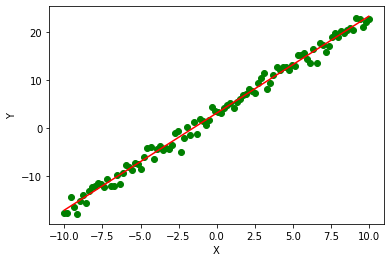

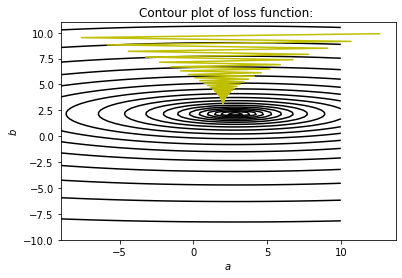

learning rate:  0.057
 [a,b]:  [[1.98929835 3.11513565]]
 error:  [[0.58229477]]


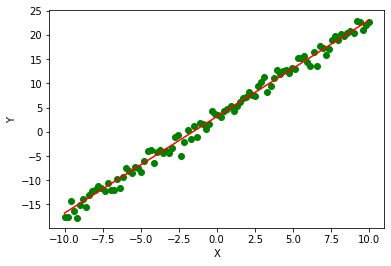

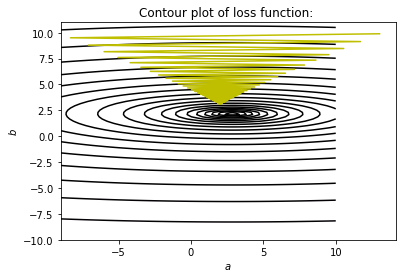

learning rate:  0.058
 [a,b]:  [[1.2955599  3.11308305]]
 error:  [[9.24466141]]


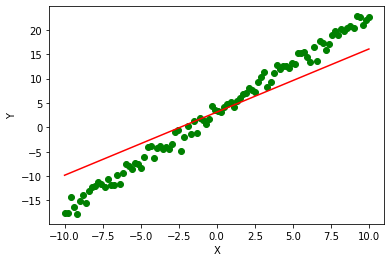

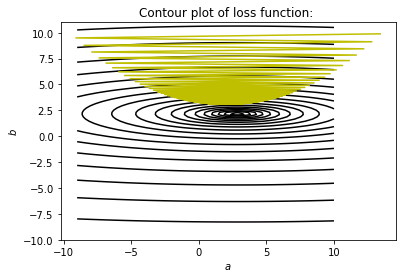

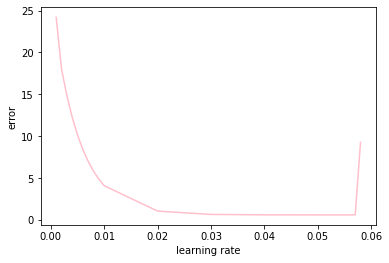

In [ ]:
'''
4. Solve for a and b using the Gradient Descent approach where the values
of p = (a, b)
T
in the (k + 1)th iteration is updated as
pk+1 = pk − η∇pE|p=pk
(3)
Vary the update rate η and the initial values (a0, b0) and note the final
solution after 100 iterations. Plot the trajectory of the solutions (ak, bk)
for varying (a0, b0, η) on the contour plot of E on (a, b) plane.

'''

n_samples=100
x=np.linspace(-10,10,n_samples)
x=x.reshape(n_samples,1)
y=2*x+3
y_obs=y+np.random.normal(loc=0, scale=1,size=(n_samples,1))
a=-9.73
b=10.31
#a=b=1
ones = np.ones((n_samples,1))
x_features = np.concatenate((x,ones), axis=1)
y_obs = y_obs.reshape(n_samples,1)
W_initial=np.zeros((2,1))
W_initial[0][0]=a
W_initial[1][0]=b
print("Initial Weights: ",W_initial)


def cost_func(y_obs,x_features,W):
    n_samples=len(y_obs)
    y_predicted=np.matmul(x_features,W)
    error = np.matmul((y_obs-y_predicted).T,(y_obs-y_predicted))/(2*n_samples)
    return error

print("Initial Error: ",cost_func(y_obs,x_features,W_initial))



n_iters=100
learning_rate=0.01

def gradient_descent(y_obs, x_features, W, learning_rate, n_iters):
    n_samples=len(y_obs)
    J_history=[]
    a_history=[]
    b_history=[]
    W=W.reshape(2,1)
    
    for i in range(n_iters):
        y_predicted=np.dot(x_features,W)
        err = (y_obs-y_predicted)
        
        derivative_a =  -np.sum(np.matmul((x_features[:,0]).T,err))/n_samples
        derivative_b =  -np.sum(np.matmul((x_features[:,1]).T,err))/n_samples
        change = np.array([derivative_a,derivative_b])
        
        change=change.reshape(2,1);
        W = W - learning_rate*change
        a_history.append(W[0][0])
        b_history.append(W[1][0])
        J_history.append(cost_func(y_obs,x_features,W))
        
    return (W,a_history,b_history,J_history)


a_vals=np.linspace(-9,10,100)
b_vals=np.linspace(-10,11,100)
j_vals=np.zeros((100,100))
for a_index,a in enumerate(a_vals):
    for b_index,b in enumerate(b_vals):
        w=np.array([a,b])
        w=w.reshape(2,1)
        j_vals[a_index][b_index]=cost_func(y_obs,x_features,w)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
aa_vals, bb_vals = np.meshgrid(a_vals,b_vals)
my_plot = ax.plot_surface(aa_vals,bb_vals,j_vals,cmap=cm.Blues_r)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('error surface')
fig.colorbar(my_plot, shrink=0.5, aspect=5)
plt.show()

plt.contour(aa_vals, bb_vals, j_vals, levels = np.logspace(-5,5,56))
plt.xlabel('$a$'); plt.ylabel("$b$")
plt.title("Contour plot of loss function for different values of $a and b$s");
plt.show()


lr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.056, 0.057, 0.058]

n_experimental=len(lr)
learning_rate_experimental=np.zeros(n_experimental)
error_experimental=np.zeros(n_experimental)

for i,learning_rate in enumerate(lr):    
    W_final,a_history,b_history,J_history = gradient_descent(y_obs,x_features,W_initial,learning_rate,n_iters)
    error=cost_func(y_obs,x_features,W_final)
    print("learning rate: ",learning_rate)
    print(" [a,b]: ",W_final.T)
    print(" error: ",error)
    
    learning_rate_experimental[i]=(learning_rate)
    error_experimental[i]=(error)
    
    y_result = np.matmul(x_features,W_final)
    plt.scatter(x,y_obs,color="green")
    plt.xlabel("X"); plt.ylabel("Y")
    plt.plot(x,y_result,color="red")
    plt.show()
    
    plt.contour(aa_vals, bb_vals, j_vals, levels = np.logspace(-5,5,56), cmap=cm.cubehelix)
    plt.xlabel('$a$'); plt.ylabel("$b$")
    plt.title("Contour plot of loss function: ");
    plt.plot(a_history, b_history, 'y-');
    plt.show()
    

plt.plot(learning_rate_experimental, error_experimental,color="pink")
plt.xlabel("learning rate"); plt.ylabel("error")
plt.show()

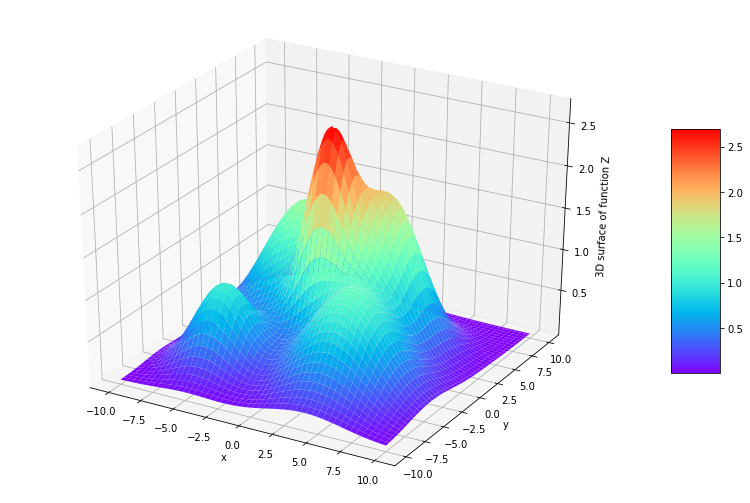

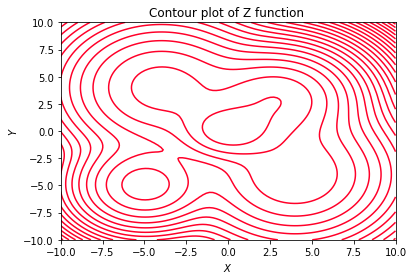

In [ ]:
'''
5. Consider the multi-modal function given by
z = 1.7∗exp
−

(x − 3)2
10
+
(y − 3)2
10 +exp
−

(x + 5)2
8
+
(y + 5)2
8
+
2 ∗ exp
−

x
2
4
+
y
2
5
 + 1.5 ∗ exp
−

(x − 4)2
18
+
(y + 4)2
16 +
1.2 ∗ exp
−

(x + 4)2
18
+
(y − 4)2
16  (4)
Display the surface plot and contour plot of the above function in the
search space given by Smin = [xmin, ymin]
T = [−10, −10]T and Smax =
[xmax, ymax]
T = [10, 10]T
.

'''

x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
z=np.zeros((100,100))
def get_vals(x,y):
    return 1.7*np.exp(-( (x-3)**2 + (y-3)**2 )/10) + np.exp(-( (x+5)**2 + (y+5)**2 )/8) + 2*np.exp(-( x*x/4 + y*y/5 )) + 1.5*np.exp(-( ((x-4)**2)/18 + ((y+4)**2)/16 )) + 1.2*np.exp(-( ((x+4)**2)/18 + ((y-4)**2)/16 ))                          


for i,xv in enumerate(x):
    for j,yv in enumerate(y):
        z[i][j]=get_vals(xv,yv)
xx,yy = np.meshgrid(x,y)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
my_plot = ax.plot_surface(xx,yy,z,cmap=cm.rainbow)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('3D surface of function Z')
fig.colorbar(my_plot, shrink=0.5, aspect=5)
plt.show()


plt.contour(xx, yy, z, levels = np.logspace(-5,5,56), cmap=cm.gist_rainbow)
plt.xlabel('$X$'); plt.ylabel("$Y$")
plt.title("Contour plot of Z function ");
plt.show()